# Project Data Wrangling dan SQL Pacmann - Rakan Abyan

## Background

Nowadays, the development of technology has led to many new opportunities in business, one of which is the emergence of e-commerce companies. E-commerce is a means of buying and selling activities through electronic media, generally via the internet. 

In this project, we will analyze e-commerce buying and selling activities. There are several analyzes that the author will show, such as
1. Analyze the payment form of Pacmann's e-Commerce transactions between 2016 - 2018.
2. Analyze the payment form of Pacmann's e-Commerce transactions in 2017
3. Determine the most transaction happened in 2017 based on trasnsaction month 
4. Analyze the most frequent transaction time in 2017 

In [44]:
import sqlite3 as db
import pandas as pd
import seaborn as sb
#connect to database or create if doesn't exist
'''
Perhatian : File untuk setiap akun bisa jadi berbeda, sehingga gunakan 'copy path' untuk mempermudah
Attention: The file for each account may be different, so use 'copy path' to make things easier.

'''
conn = db.connect('olist.db')

# In order to execute SQL statements and fetch results from SQL queries, we will need to use a database cursor. Call con.cursor() to create the Cursor
cur = conn.cursor()

#Show all Tables in database using fetchall
table = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
table.fetchall()


[('olist_order_customer_dataset',),
 ('olist_order_dataset',),
 ('olist_order_reviews_dataset',),
 ('olist_order_payments_dataset',),
 ('olist_order_items_dataset',),
 ('olist_products_dataset',),
 ('olist_sellers_dataset',),
 ('olist_geolocation_dataset',),
 ('product_category_name_translation',)]

# # Data Cleaning dan Manipulating

To answer the analysis stated in this project, I used the tables 'olist_order_dataset' and 'olist_order_payments_dataset'. The first thing I will do is to identify missing elements such as none, NaN or not_identified in both tables. I will also clean up the duplicate data. 

In [9]:
#Show data set 'olist_order_dataset'
#Perform SQL query and return pandas data frame
df_order_datas = pd.read_sql_query (
"""
SELECT * FROM olist_order_dataset;
"""
,conn)
df_order_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          99441 non-null  int64 
 1   order_id                       99441 non-null  object
 2   customer_id                    99441 non-null  object
 3   order_status                   99441 non-null  object
 4   order_purchase_timestamp       99441 non-null  object
 5   order_approved_at              99281 non-null  object
 6   order_delivered_carrier_date   97658 non-null  object
 7   order_delivered_customer_date  96476 non-null  object
 8   order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.8+ MB


In [16]:
# Step 1: change columns 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', and 'order_estimated_delivery_date' type into datetime64[ns]

df_order_datas['order_purchase_timestamp'] = df_order_datas['order_purchase_timestamp'].astype('datetime64[ns]')
df_order_datas['order_approved_at'] = df_order_datas['order_approved_at'].astype('datetime64[ns]')
df_order_datas['order_delivered_carrier_date'] = df_order_datas['order_delivered_carrier_date'].astype('datetime64[ns]')
df_order_datas['order_delivered_customer_date'] = df_order_datas['order_delivered_customer_date'].astype('datetime64[ns]')
df_order_datas['order_estimated_delivery_date'] = df_order_datas['order_estimated_delivery_date'].astype('datetime64[ns]')
df_order_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          99441 non-null  int64         
 1   order_id                       99441 non-null  object        
 2   customer_id                    99441 non-null  object        
 3   order_status                   99441 non-null  object        
 4   order_purchase_timestamp       99441 non-null  datetime64[ns]
 5   order_approved_at              99281 non-null  datetime64[ns]
 6   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 7   order_delivered_customer_date  96476 non-null  datetime64[ns]
 8   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(3)
memory usage: 6.8+ MB


In [17]:
#Step 2 check our order status
df_order_datas.isnull().sum()

index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
#check our order status
#Perform SQL query and return pandas data frame
df_count_order = pd.read_sql_query (
"""
SELECT order_status, count(order_status) as frequency FROM olist_order_dataset group by order_status;
"""
, conn)
df_count_order

,order_status,frequency
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [33]:
'''
Step 4
Since status 'approved' has same status like status 'processing', 'invoiced', 'unavailable' because column 'order_purchase_timestamp' and 'order_approved_at' 
were already filled, therefore we must made into one status. We set 4 different status as a status 'approved'
'''

df_order_datas['order_status'] = df_order_datas['order_status'].replace(['processing', 'invoiced', 'unavailble'], 'approved')
df_order_datas

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [14]:
'''
Step 5 
now we move on into dataset 'olist_order_payments_dataset' 
'''

#Show Payment data set
#Perform SQL query and return pandas data frame

df_payments = pd.read_sql_query (
"""
SELECT * FROM olist_order_payments_dataset;
"""
,conn)
df_payments

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Now we clean payment data. We should manipulate, if there is unavalible or non_defined elements, such as change status, or deleted elements. 

In [23]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 103886 non-null  int64  
 1   order_id              103886 non-null  object 
 2   payment_sequential    103886 non-null  int64  
 3   payment_type          103886 non-null  object 
 4   payment_installments  103886 non-null  int64  
 5   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [24]:
df_payments.isnull().sum()

index                   0
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
#Show Payment data set
#Perform SQL query and return pandas data frame

df_payments_recap = pd.read_sql_query (
"""
SELECT payment_type, count(payment_type) as frequency FROM olist_order_payments_dataset group by payment_type;
"""
,conn)
df_payments_recap

,payment_type,frequency
0,boleto,19784
1,credit_card,76795
2,debit_card,1529
3,not_defined,3
4,voucher,5775


We find 3 non_defined payment type. Now, let's check the non_defined payment type and also the status of those payment by order_status

In [29]:
#Show status non_defined in Payment data set with connection of status order 
#Perform SQL query and return pandas data frame

df_payments_NaN = pd.read_sql_query (
"""
SELECT * FROM olist_order_payments_dataset where payment_type = 'not_defined';
"""
,conn)
df_payments_NaN 

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
1,57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
2,94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [31]:
#Show status non_defined in Payment data set
#Perform SQL query and return pandas data frame

df_payments_NaN_status = pd.read_sql_query (
"""
SELECT * FROM olist_order_dataset ood JOIN olist_order_payments_dataset oopd ON ood.order_id = oopd.order_id where oopd.payment_type = 'not_defined';
"""
,conn)
df_payments_NaN_status 

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,39919,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,None,None,None,2018-09-10 00:00:00,51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
1,1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,None,None,None,2018-09-12 00:00:00,57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
2,40235,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,None,None,None,2018-09-11 00:00:00,94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


As 3 payments has status non_defined with the order_status 'canceled', we can remove those 3 datas from payment. Later we will join olist_order_dataset wilth olist_order_payments_dataset

In [32]:
#Show Payment data set without status non_defined
#Perform SQL query and return pandas data frame 
df_payments_clean = pd.read_sql_query (
"""
SELECT * FROM olist_order_payments_dataset where payment_type != 'not_defined';
"""
,conn)
df_payments_clean

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103878,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103879,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103880,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103881,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [34]:
#Combine table df_order_datas with df_payments_clean by using join on order_id
merge_payments_order = pd.merge(df_order_datas, df_payments_clean, on = 'order_id')
merge_payments_order 

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_y,payment_sequential,payment_type,payment_installments,payment_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10770,1,credit_card,1,18.12
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,44246,3,voucher,1,2.00
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,91130,2,voucher,1,18.59
3,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,7652,1,boleto,1,141.46
4,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,11176,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103878,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,50534,1,credit_card,3,85.08
103879,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,48750,1,credit_card,3,195.00
103880,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,96280,1,credit_card,5,271.01
103881,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1026,1,credit_card,4,441.16


In [36]:
'''
Last but not least, for the last step, we have to separate order_purchase_time by time, month, and year. 
'''

merge_payments_order['purchase_year'] = pd.DatetimeIndex(merge_payments_order['order_purchase_timestamp']).year;
merge_payments_order['purchase_hour'] = pd.DatetimeIndex(merge_payments_order['order_purchase_timestamp']).hour;
merge_payments_order['purchase_month'] = pd.DatetimeIndex(merge_payments_order['order_purchase_timestamp']).month;
merge_payments_order

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_y,payment_sequential,payment_type,payment_installments,payment_value,purchase_year,purchase_hour,purchase_month
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10770,1,credit_card,1,18.12,2017,10,10
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,44246,3,voucher,1,2.00,2017,10,10
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,91130,2,voucher,1,18.59,2017,10,10
3,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,7652,1,boleto,1,141.46,2018,20,7
4,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,11176,1,credit_card,3,179.12,2018,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103878,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,50534,1,credit_card,3,85.08,2017,9,3
103879,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,48750,1,credit_card,3,195.00,2018,12,2
103880,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,96280,1,credit_card,5,271.01,2017,14,8
103881,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1026,1,credit_card,4,441.16,2018,21,1


# Data Visualization 

1. Analyze the payment form of Pacmann's e-Commerce transactions October 2016 - 2018

In [50]:
sort_min_date = merge_payments_order['order_purchase_timestamp'].min()
sort_max_date = merge_payments_order['order_purchase_timestamp'].max()
print(f'first Transaction date: {sort_min_date}, last transaction date: {sort_max_date}')

first Transaction date: 2016-09-04 21:15:19, last transaction date: 2018-10-17 17:30:18


,transaction_type,counts
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529


<AxesSubplot:ylabel='counts'>

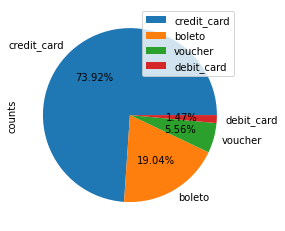

In [51]:
payment_type_recap = merge_payments_order['payment_type'].value_counts().rename_axis('transaction_type').reset_index(name='counts')
display(payment_type_recap)
payment_type_recap.plot.pie(labels = ["credit_card", "boleto", "voucher", "debit_card"], y ='counts', autopct='%.2f%%')

The majority of Pacmann E-Commerce users in Brazil use credit cards as a form of payment.

2. Analyze the payment form happened in 2017 based on month 

,transaction_type,counts
0,credit_card,34568
1,boleto,9508
2,voucher,3027
3,debit_card,422


<AxesSubplot:ylabel='counts'>

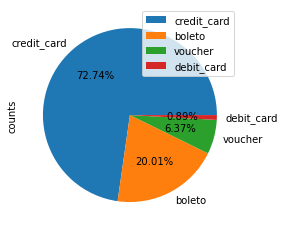

In [42]:
payment_2017 = merge_payments_order.loc[merge_payments_order['purchase_year'] == 2017]
payment_2017_recap = payment_2017['payment_type'].value_counts().rename_axis('transaction_type').reset_index(name='counts')
display(payment_2017_recap)
payment_2017_recap.plot.pie(labels = ["credit_card", "boleto", "voucher", "debit_card"], y ='counts', autopct='%.2f%%')

Most of Pacmann E-Commerce users in Brazil 2017 use credit cards as a form of payment.

3. Analyze the most frequent transaction month in 2017

<AxesSubplot:xlabel='transaction_month', ylabel='counts'>

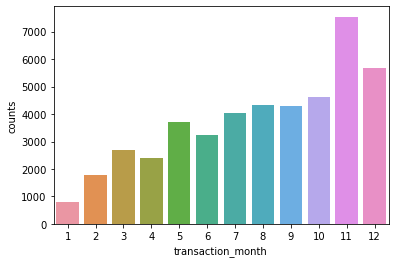

In [46]:
data_order_distinct = merge_payments_order.drop_duplicates(subset = 'order_id')
order_2017 = data_order_distinct.loc[data_order_distinct['purchase_year'] == 2017]
order_per_month_2017 = order_2017.groupby(['purchase_month'] )['order_id'].nunique().rename_axis('transaction_month').reset_index(name='counts')
display(order_per_month_2017)
sb.barplot(data = order_per_month_2017, x = 'transaction_month', y = 'counts')

4. Analyze the most frequent transaction time in 2017

,transaction_hour,counts
0,0,1157
1,1,595
2,2,261
3,3,128
4,4,104
5,5,95
6,6,216
7,7,529
8,8,1280
9,9,2058


<AxesSubplot:xlabel='transaction_hour', ylabel='counts'>

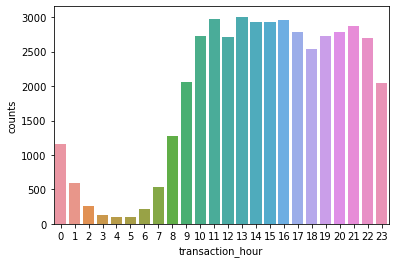

In [49]:
tr_time_2017 = order_2017.groupby(['purchase_hour'])['order_id'].nunique().rename_axis('transaction_hour').reset_index(name='counts')
display(tr_time_2017)
sb.barplot(data = tr_time_2017, x = 'transaction_hour', y = 'counts')